In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon
import cv2
DATA_DIR = 'data/'

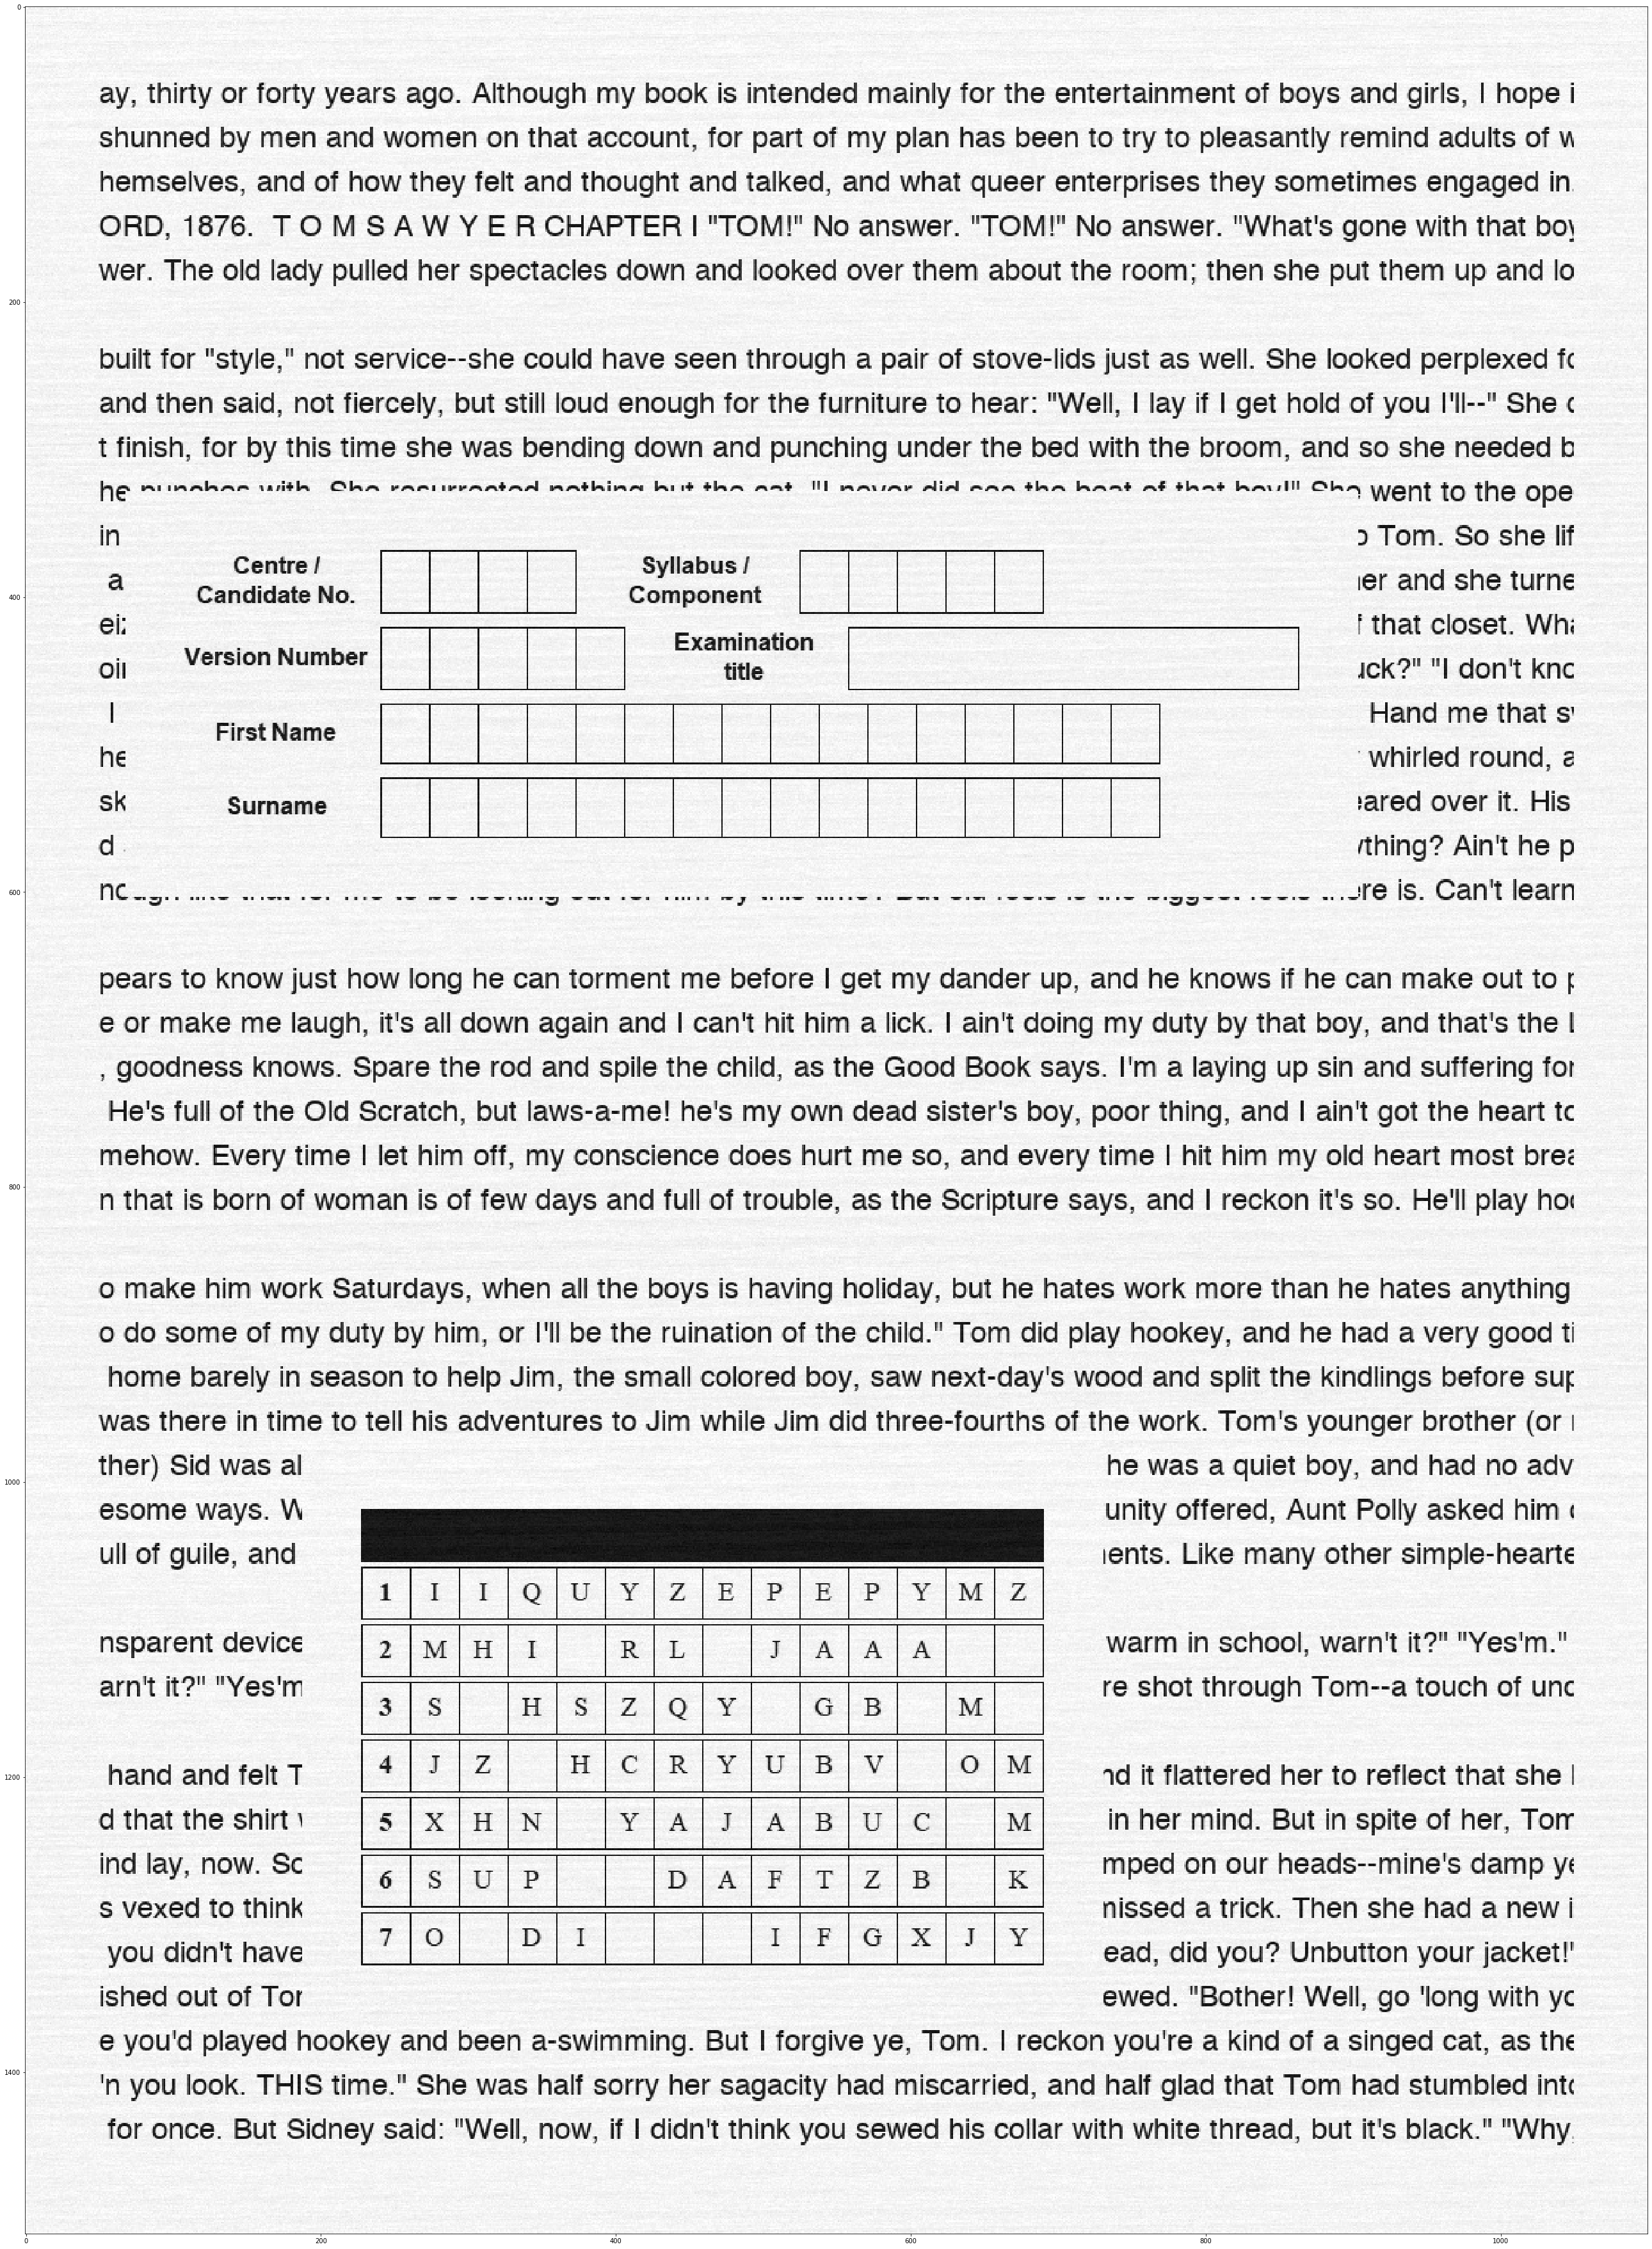

In [3]:
#im = cv2.imread("table_images/table_36.jpg", cv2.IMREAD_GRAYSCALE)
#im = cv2.imread("table_images/table_467.jpg", cv2.IMREAD_GRAYSCALE)
im = cv2.imread("table_images/table_1.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (64,64))
plt.imshow(im, cmap='gray')

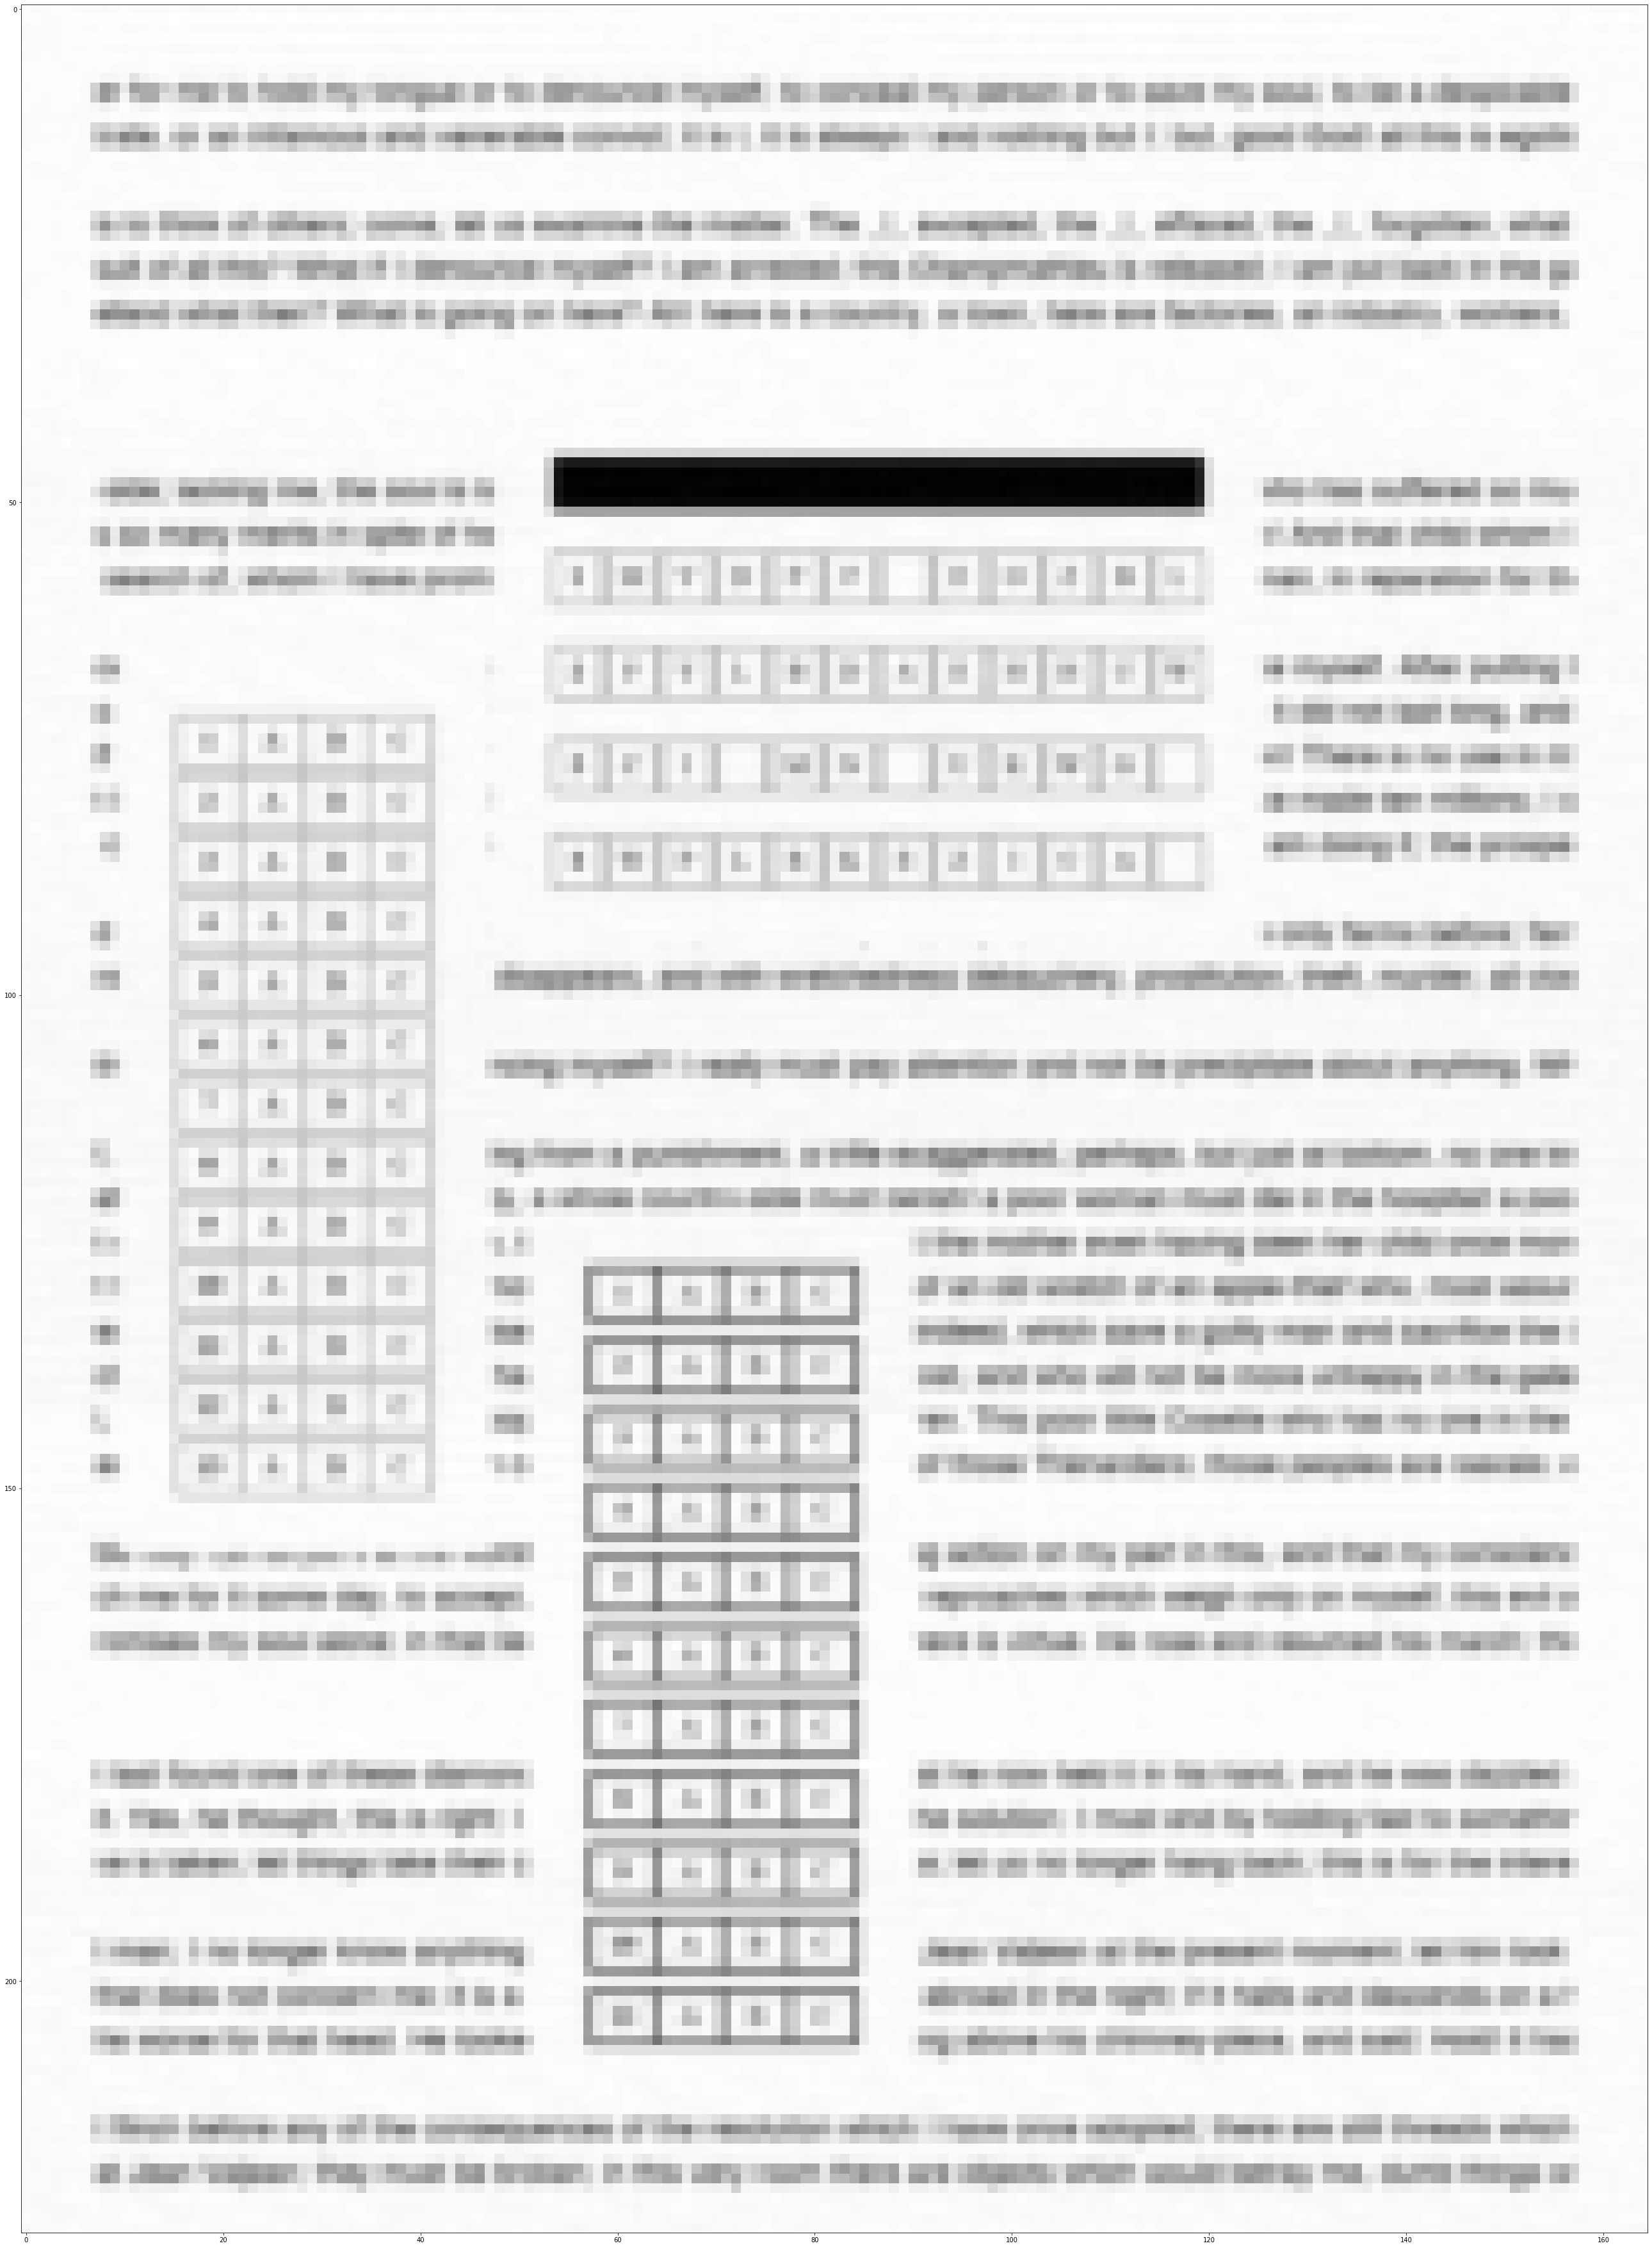

In [11]:
from skimage.transform import rescale, resize

image_rescaled = rescale(im, 0.15, anti_aliasing=True)
plt.figure(figsize = (64,64))
plt.imshow(image_rescaled, cmap='gray')

In [3]:
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)

-1

In [42]:
for contour in find_contours(im, 0):
    coords = approximate_polygon(contour, tolerance=2.5)
    ax.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
    coords2 = approximate_polygon(contour, tolerance=39.5)
    ax.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
    print("Number of coordinates:", len(contour), len(coords), len(coords2))

ax.axis((0, 800, 0, 800))

plt.show()

NameError: name 'ax' is not defined

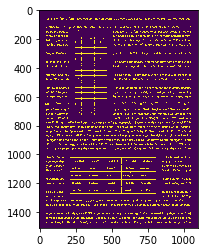

In [25]:
from skimage.filters import hessian

result = hessian(im, scale_step=10, alpha=2, beta=10, gamma=20, black_ridges=False)
plt.imshow(result)

In [13]:
from skimage import morphology

plt.figure(figsize = (64,64))
c = morphology.remove_small_objects(image_rescaled, 12, connectivity=2)
plt.imshow(c, cmap='gray')

TypeError: Only bool or integer image types are supported. Got float64.

<Figure size 4608x4608 with 0 Axes>

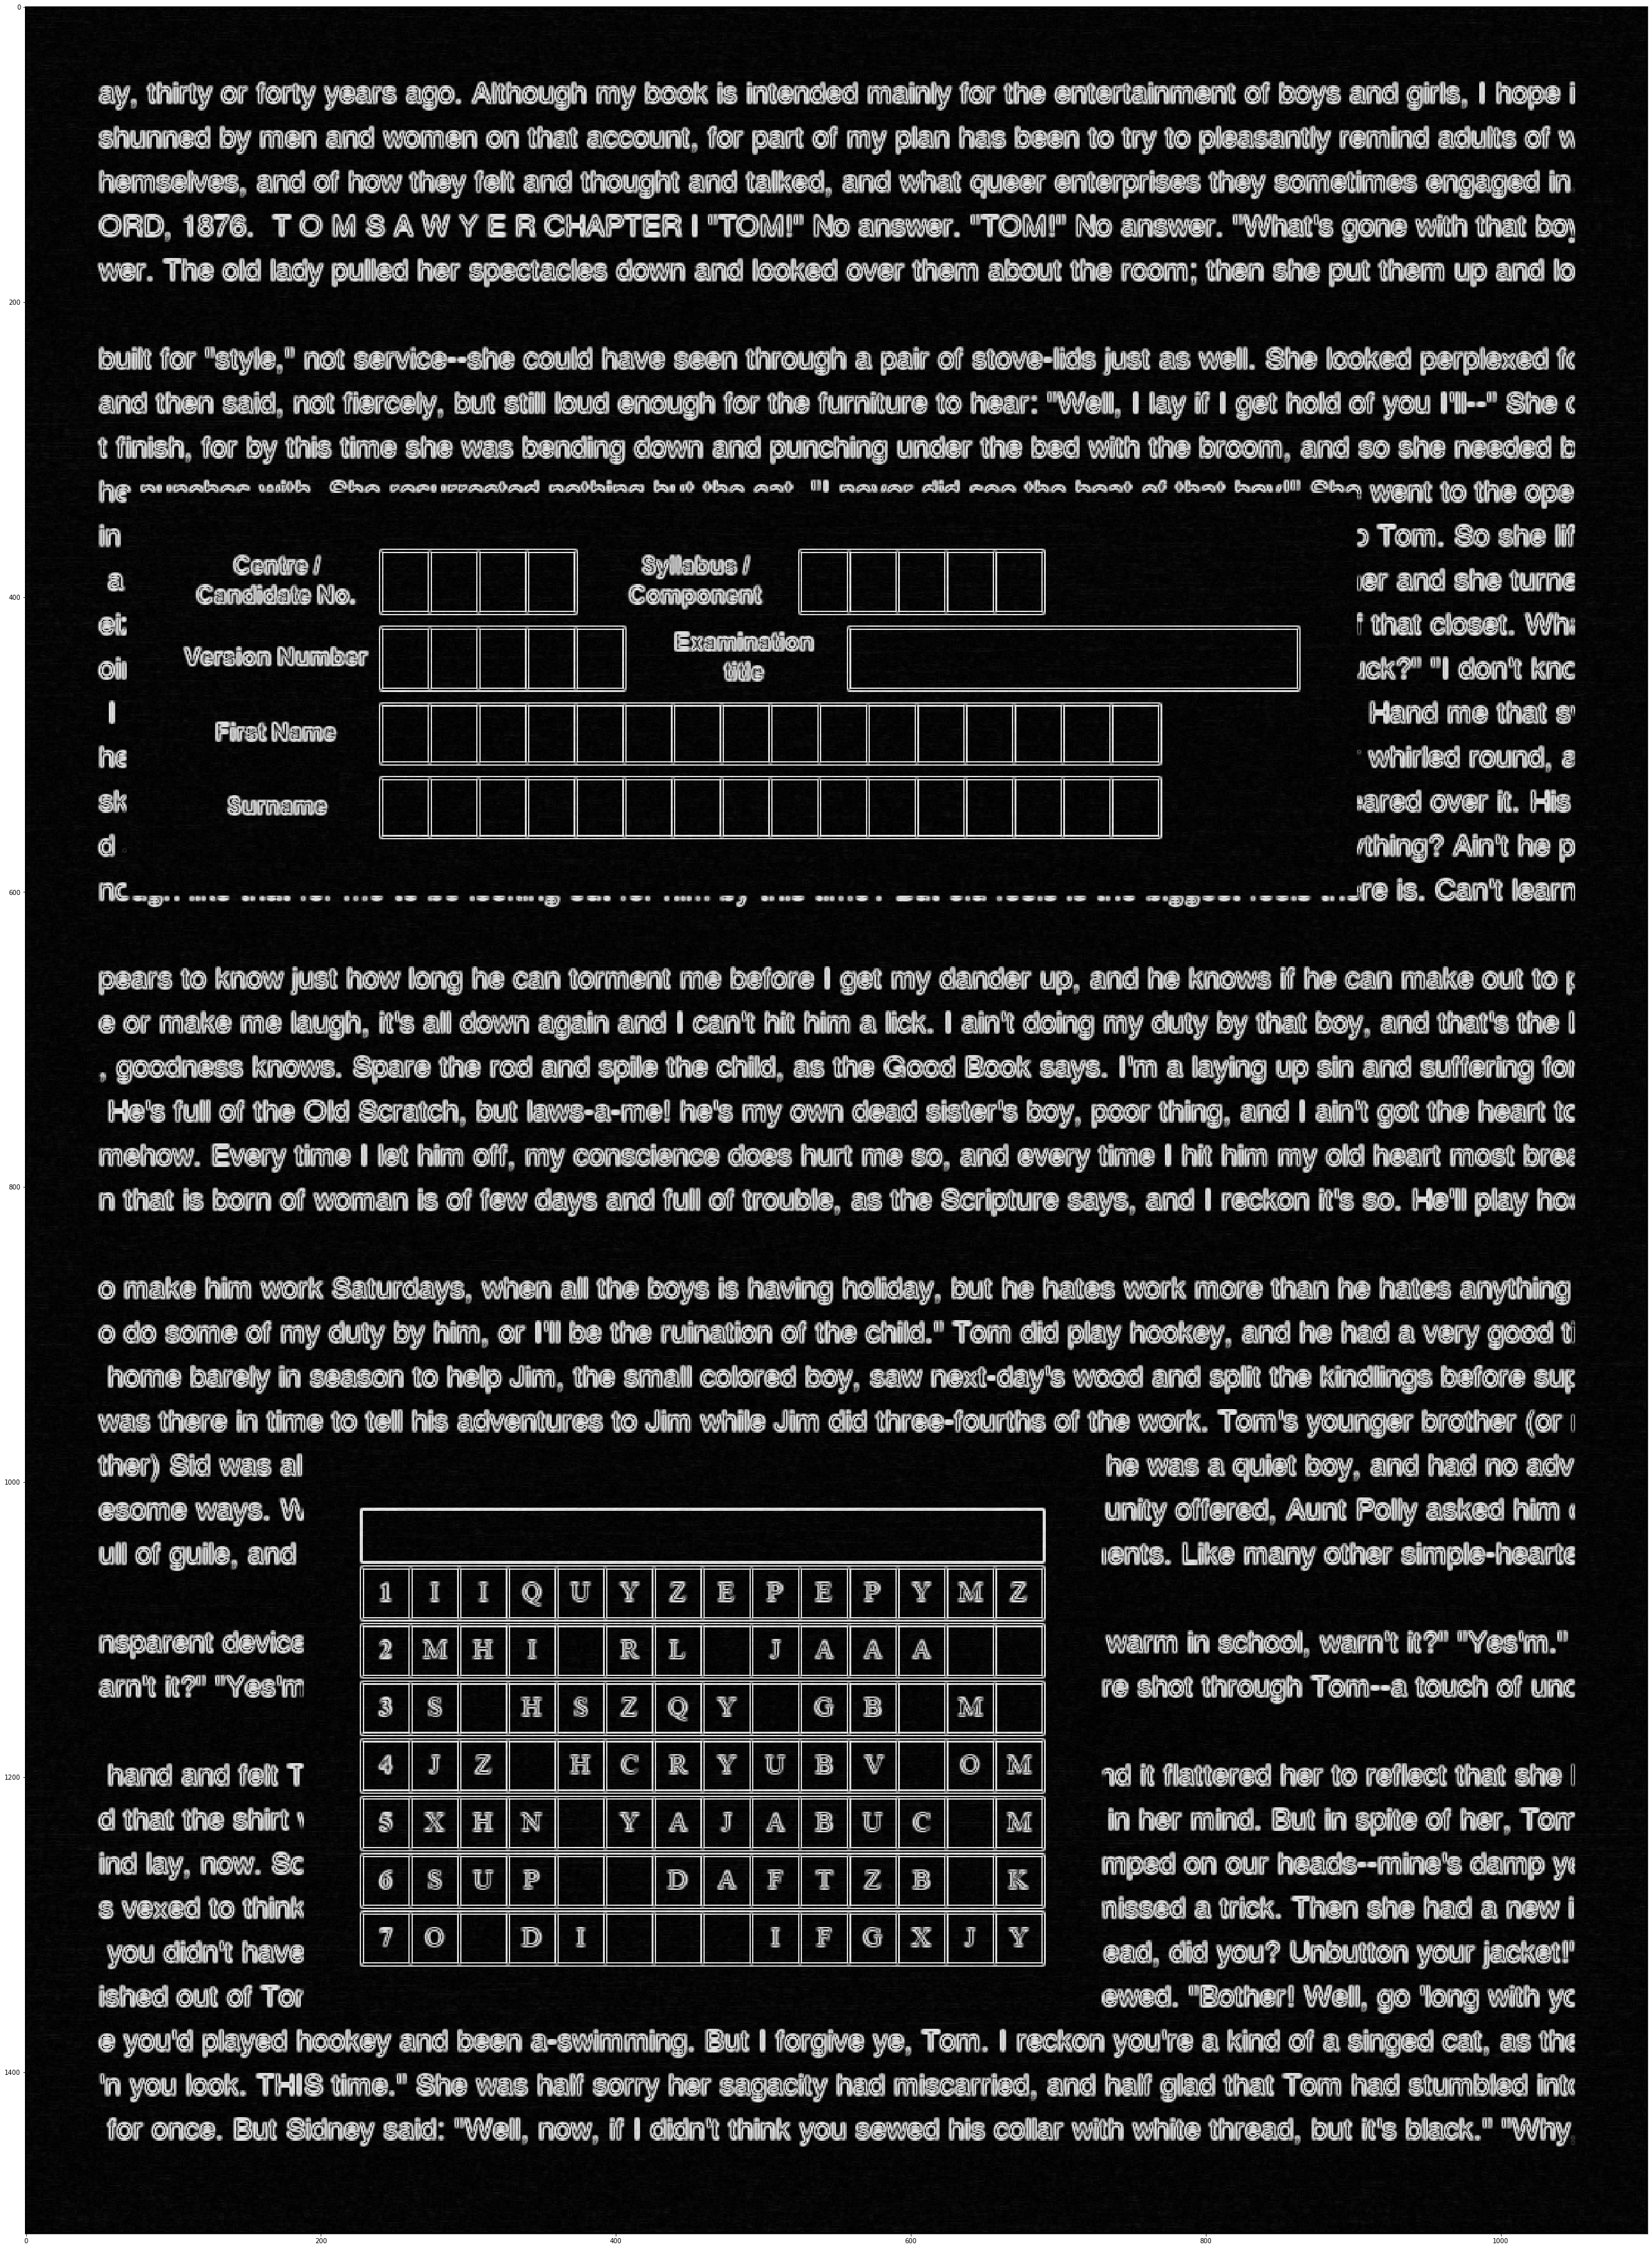

In [4]:
from skimage.filters import roberts, sobel, gaussian, scharr

#edgesr = roberts(image_rescaled)
#edgess = sobel(image_rescaled)
edgess_clean = sobel(im)
#gauss = gaussian(image_rescaled,  sigma=2)
#gauss_sobel = sobel(gauss)
#edge_scharr = scharr(gauss)

#diff_sobel_scharr = edge_scharr - edgess
#diff_roberts_scharr = edge_scharr - edgesr
#diff_gauss_sobel = edgess - gauss

#sobel_gauss = gaussian(edgess, sigma=2)
#plt.imshow(edgesr)
plt.figure(figsize = (64,64))
plt.imshow(edgess_clean, cmap='gray')

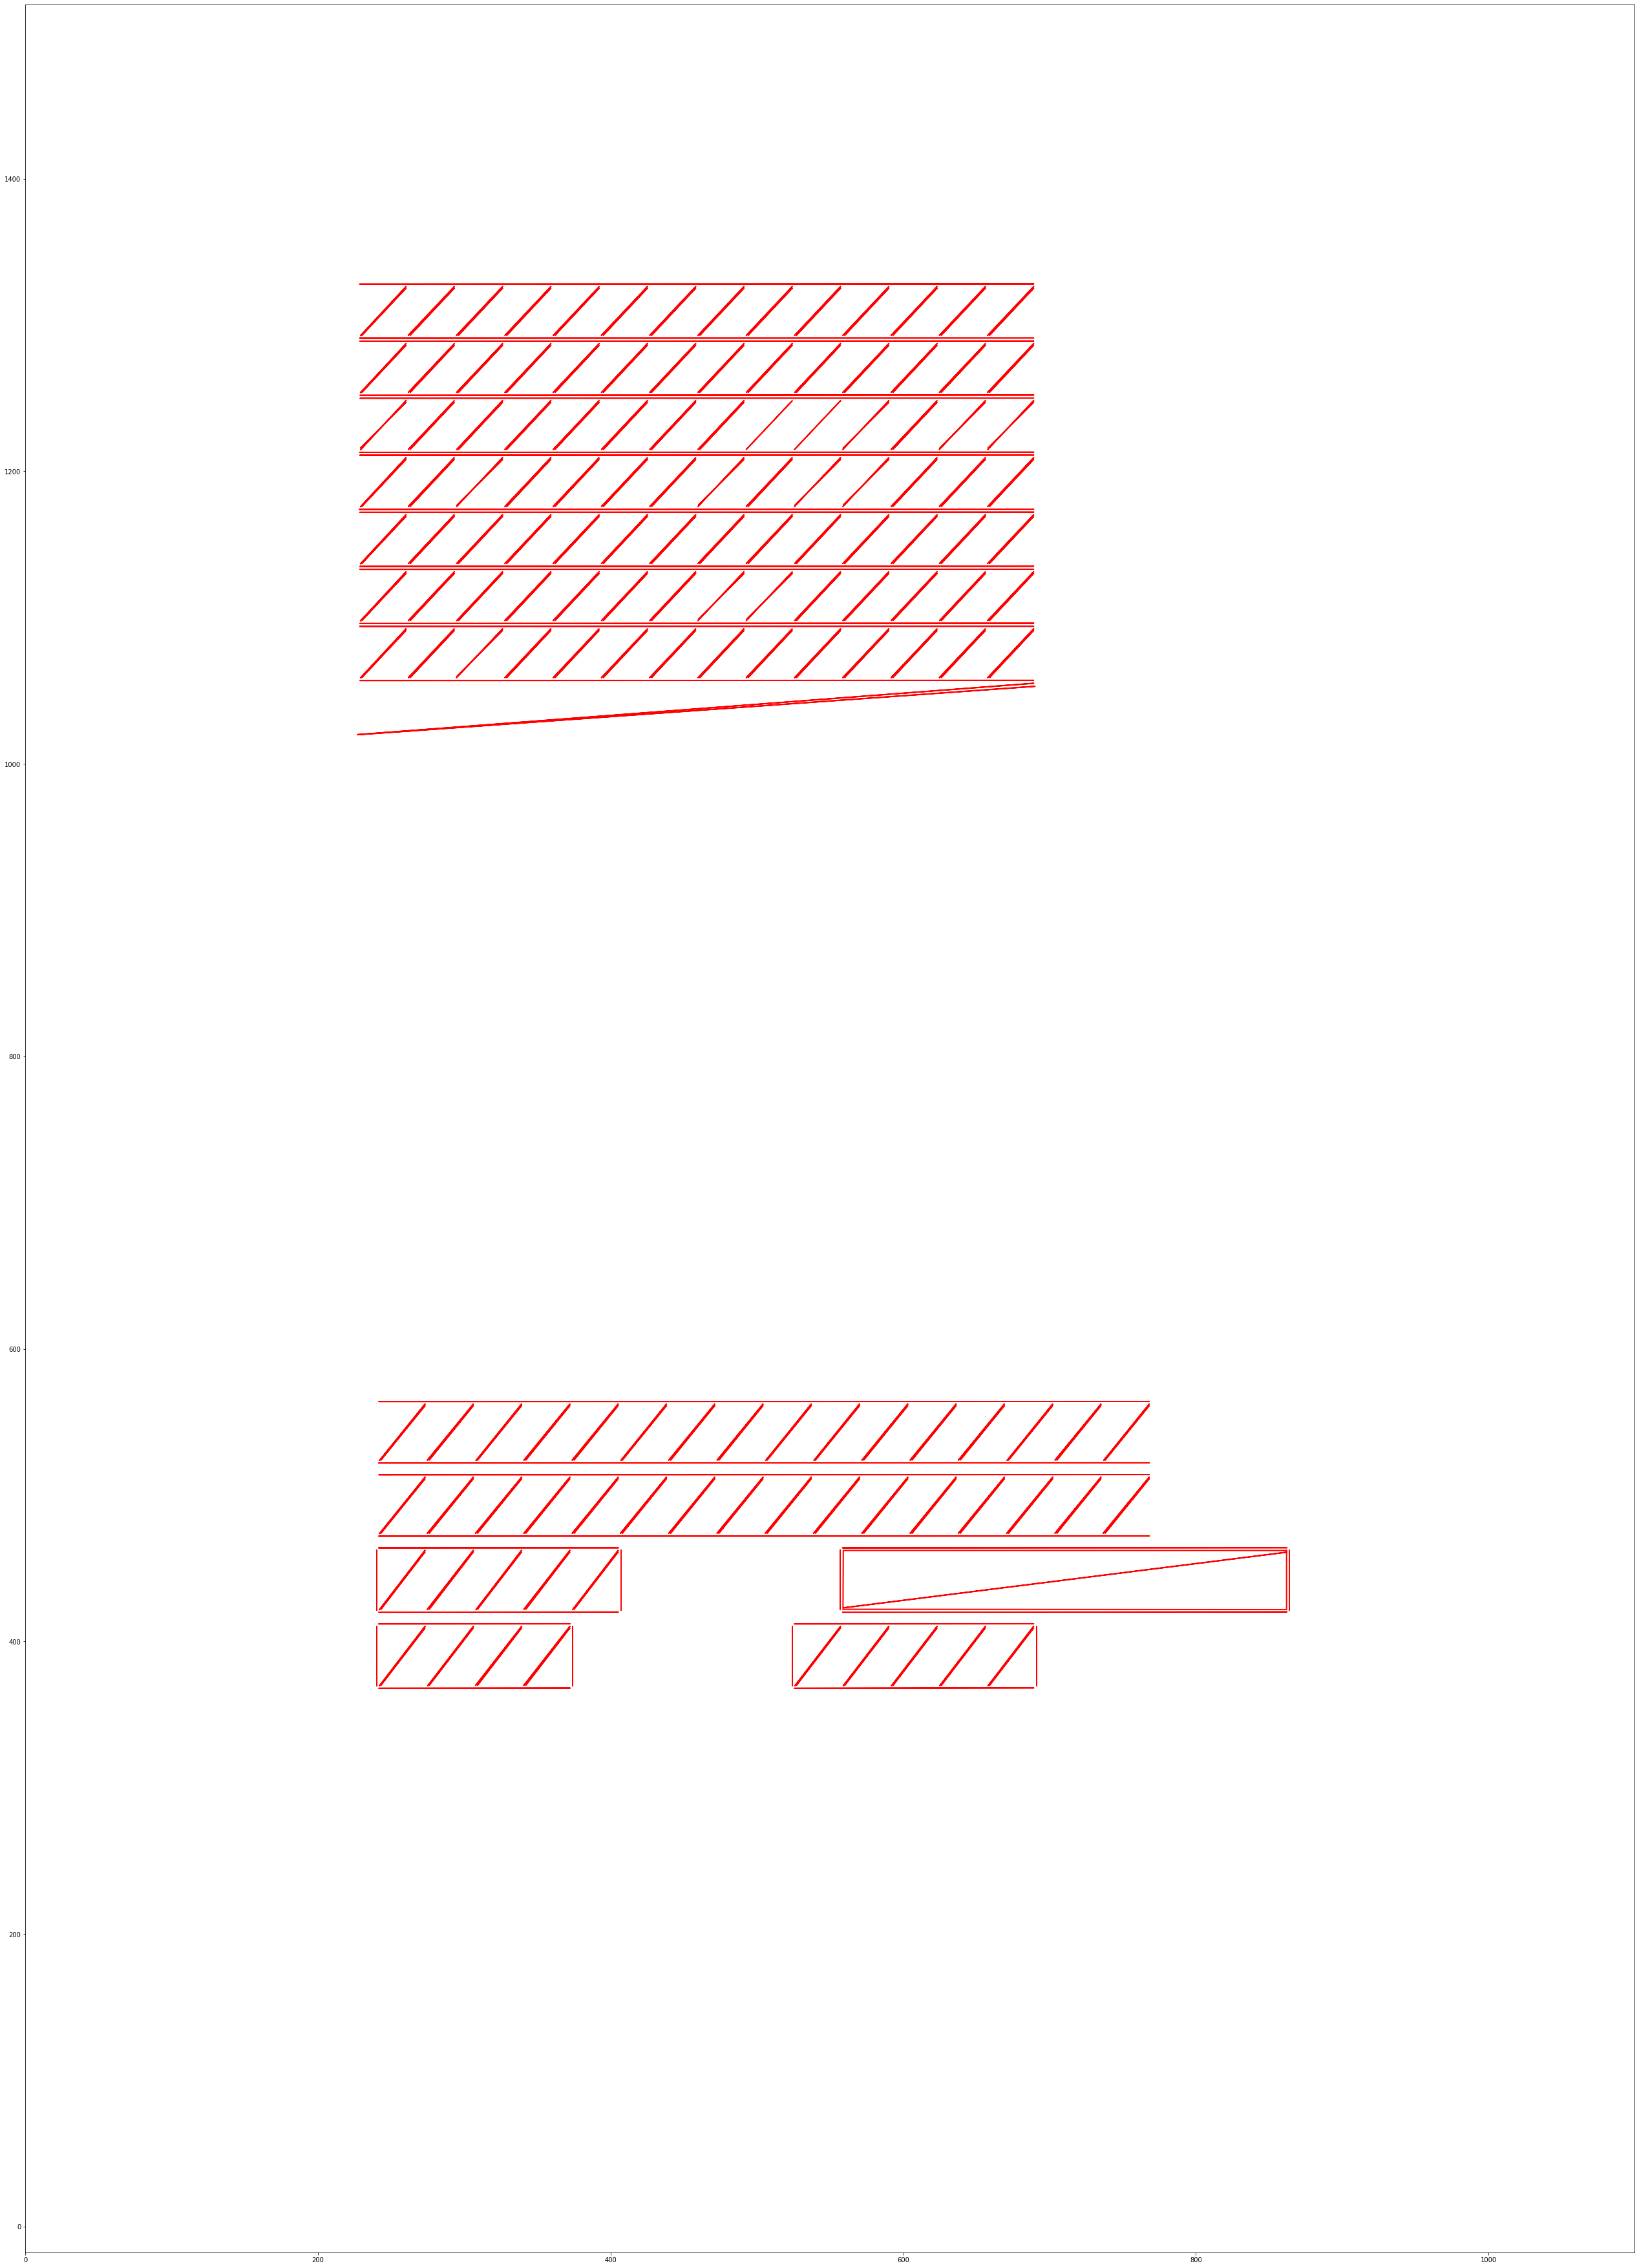

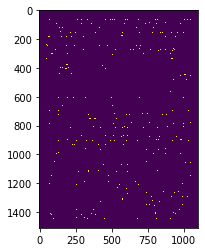

In [5]:
from skimage.measure import approximate_polygon
from skimage import draw
import numpy as np
from skimage.draw import polygon

def poly2mask(vertex_row_coords, vertex_col_coords, shape): # this is added in version 0.16.dev0
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=np.bool)
    mask[fill_row_coords, fill_col_coords] = True
    return mask

contours = find_contours(edgess_clean, 0.45, fully_connected='high', positive_orientation='high')

# Display the image and plot all contours found
    

fig, ax = plt.subplots(ncols=1, figsize=(64, 64))

x = []
y = []
#ax.plot(contours[-1][:, 1], contours[-1][:, 0], '-r', linewidth=2)
poly_coords = []
for n, contour in enumerate(contours):
    coords = approximate_polygon(contour, tolerance=39.5)
    plt.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
    #plt.plot(contour)
    #print(coords[:, 0][0], coords[:, 1][0])
    #ax.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
    #ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    #x.append(coords[:, 0])
    #y.append(coords[:, 1])
    rr, cc = coords[:, 0][0], coords[:, 1][0]#polygon(coords[:, 0][0], coords[:, 1][0])
    poly_coords.append([rr, cc])
"""   
#mask = poly2mask(y, x, edgess_clean.shape)
img_from_poly = np.zeros(edgess_clean.shape, dtype=np.uint8)

#print(poly_coords)
for rr, cc in poly_coords:
    #print(rr, cc)
    img_from_poly[int(rr), int(cc)] = 1

plt.figure()
plt.imshow(img_from_poly)
ax.axis('image')
#ax.set_xticks([])
#ax.set_yticks([])
plt.show()
"""

In [40]:
from skimage import feature
#from skimage.transform import integral_image

#int_img =  integral_image(im)
#lbp_code = feature.multiblock_lbp(diff_roberts_scharr, 0, 0, 90, 90)
#edges1 = feature.draw_multiblock_lbp(diff_roberts_scharr,  0, 0, 90, 90,
#                          lbp_code=lbp_code, alpha=0.5)
#w, q = feature.corner_foerstner(diff_roberts_scharr)
#accuracy_thresh = 0.5
#roundness_thresh = 0.3
#foerstner = (q > roundness_thresh) * (w > accuracy_thresh) * w
#cpk = feature.corner_peaks(foerstner, min_distance=1)

#plt.imshow(edges1)
#cpk



array([], shape=(0, 2), dtype=int64)

Variance retained 83.15879231822245 %
Compression Ratio 3.0303030303030303 %
Variance retained 96.2058548969776 %
Compression Ratio 15.151515151515152 %
Variance retained 99.20019958495676 %
Compression Ratio 75.75757575757575 %


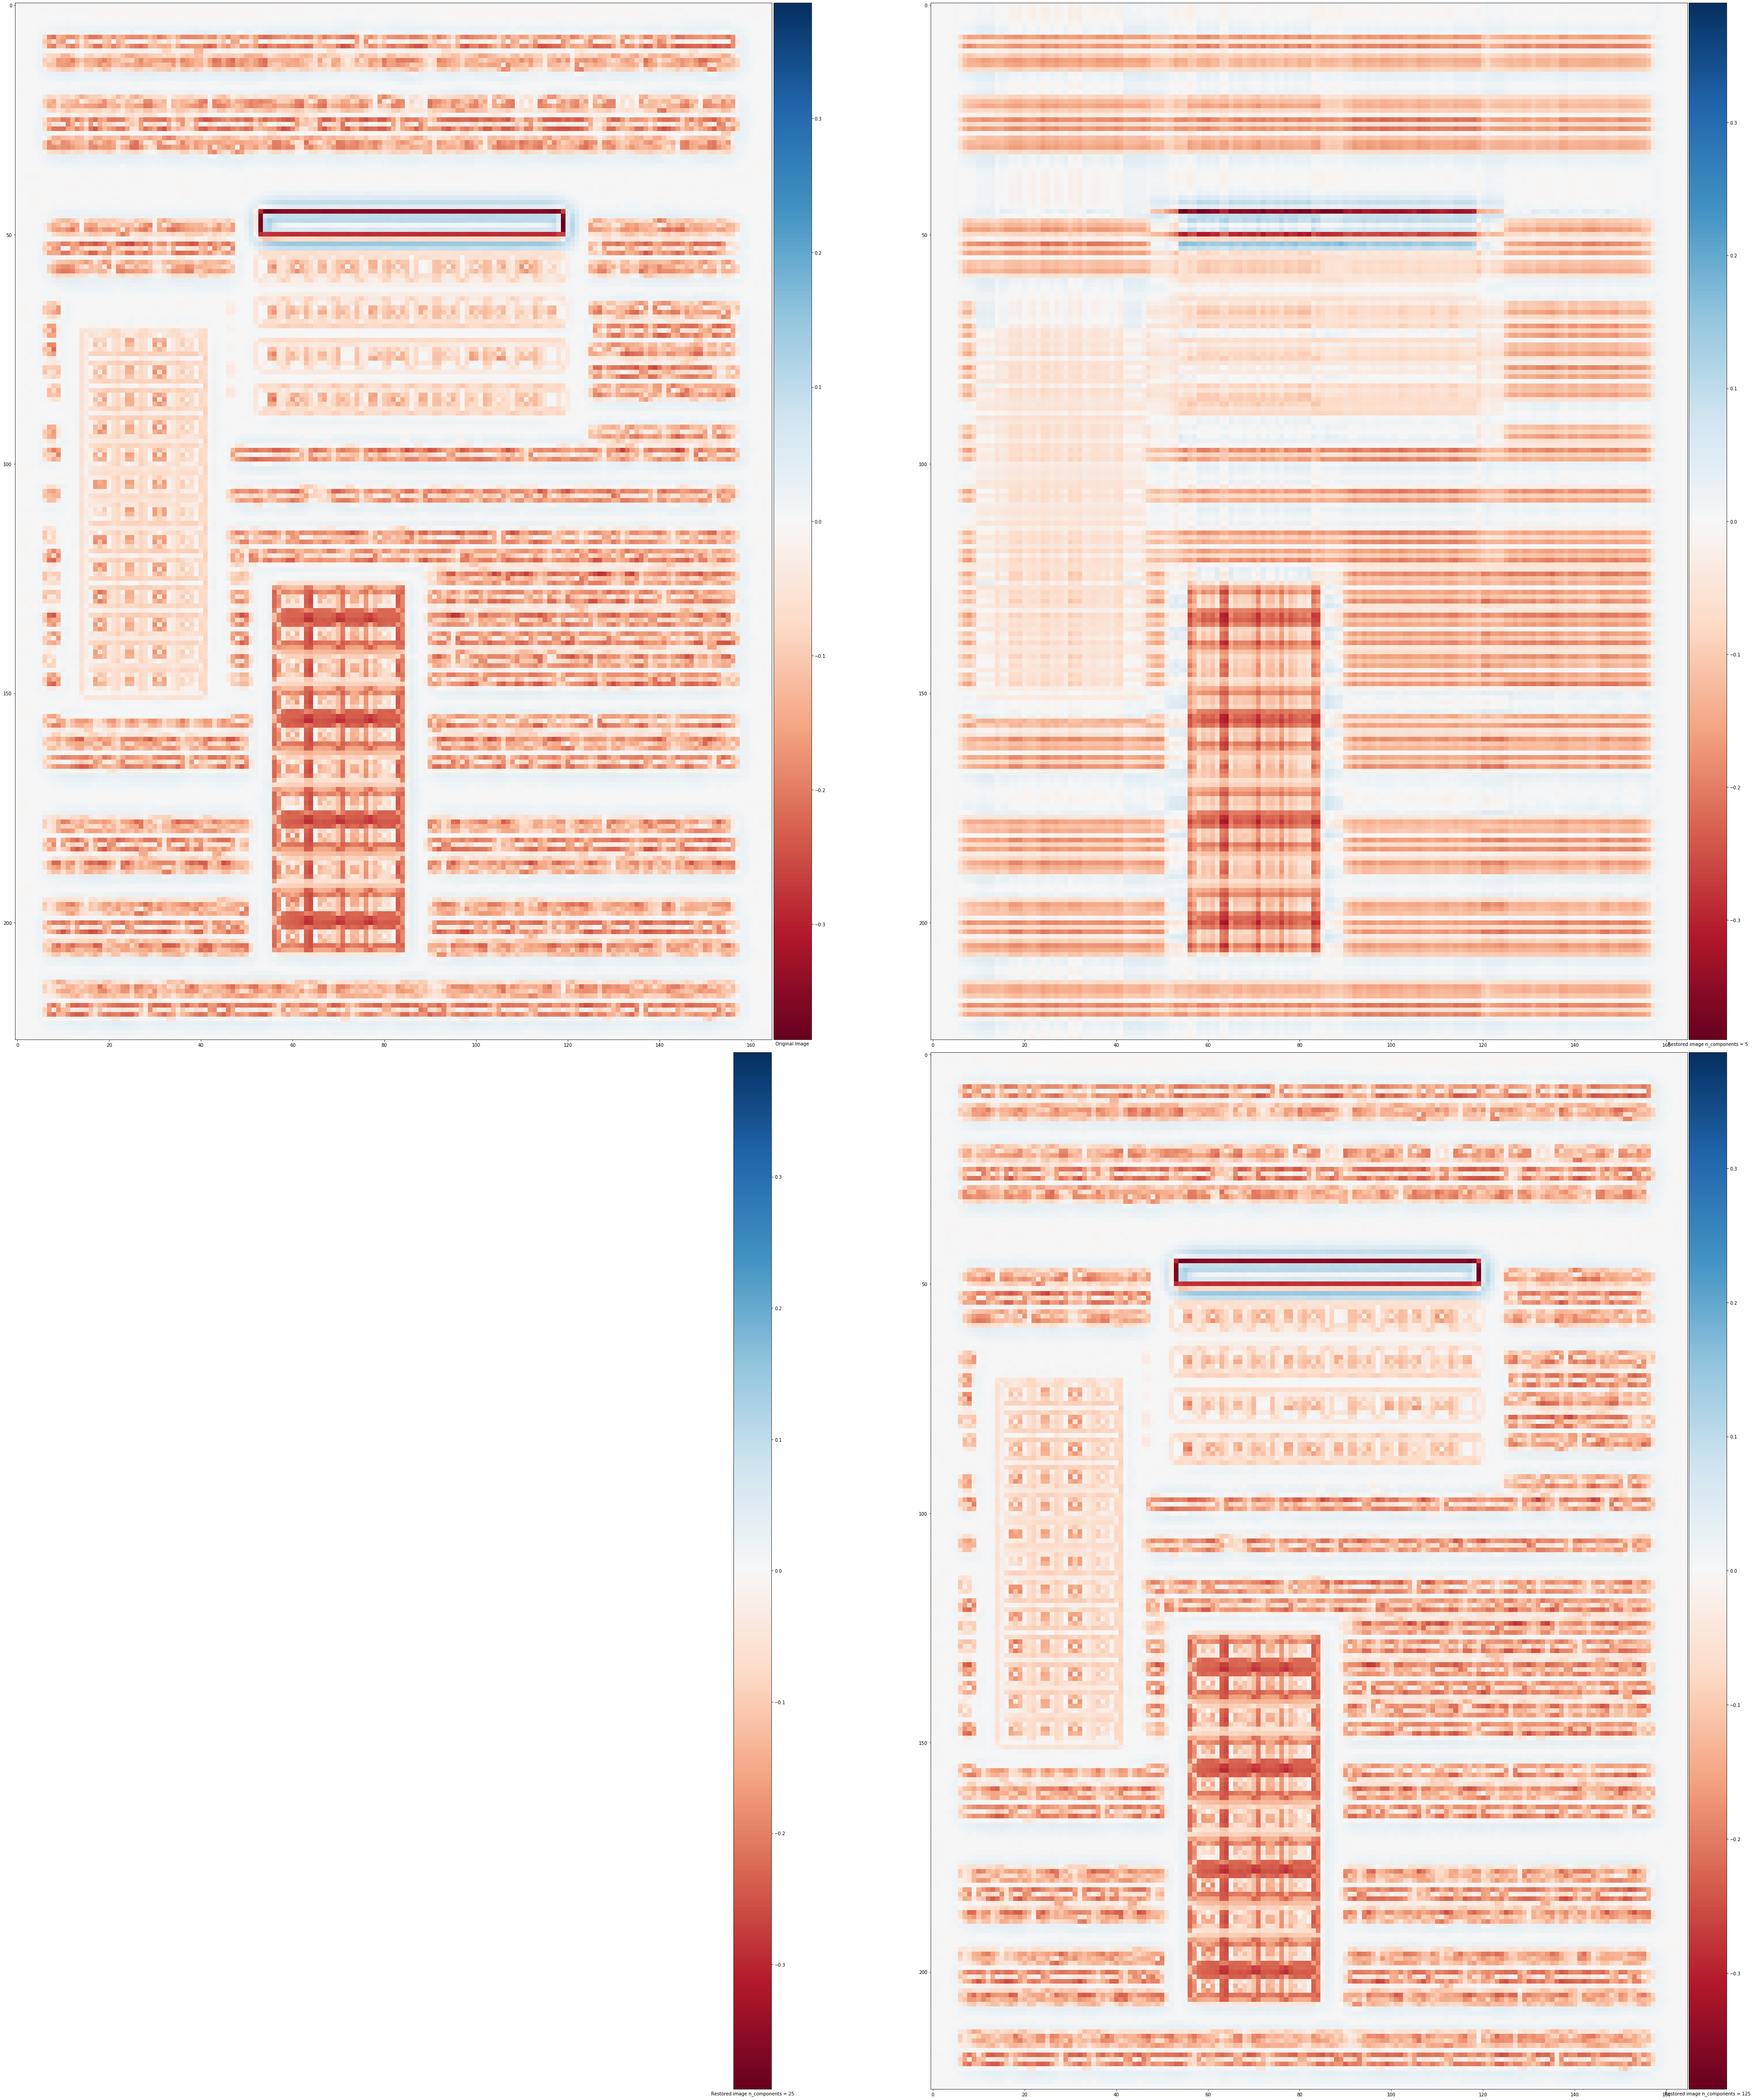

In [33]:
from sklearn.decomposition import PCA
from pylab import *
from skimage import data, io, color

plt.figure(figsize=(64, 64))

subplot(2, 2, 1)
io.imshow(diff_roberts_scharr)
xlabel('Original Image')

for i in range(1, 4):
    n_comp = 5 ** i
    pca = PCA(n_components = n_comp)
    pca.fit(diff_roberts_scharr)
    gs_pca = pca.fit_transform(diff_roberts_scharr)
    # subplot(2, 2, 2)
    # io.imshow(coke_gray_pca)
    # xlabel('Image after applying PCA')
    gs_restored = pca.inverse_transform(gs_pca)
    subplot(2, 2, i+1)
    io.imshow(gs_restored)
    xlabel('Restored image n_components = %s' %n_comp)
    print('Variance retained %s %%' %((1 - sum(pca.explained_variance_ratio_) / size(pca.explained_variance_ratio_)) * 100))
    print('Compression Ratio %s %%' %(float(size(gs_pca)) / size(diff_roberts_scharr) * 100))
show()


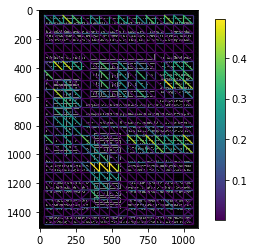

In [78]:
from skimage.segmentation import slic
from skimage.future import graph
from skimage import io, color

labels = slic(im, compactness=30, n_segments=400)

g = graph.rag_boundary(labels, edgess)
edges_rgb = color.gray2rgb(edgess)
lc = graph.show_rag(labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)

plt.colorbar(lc, fraction=0.03)
io.show()

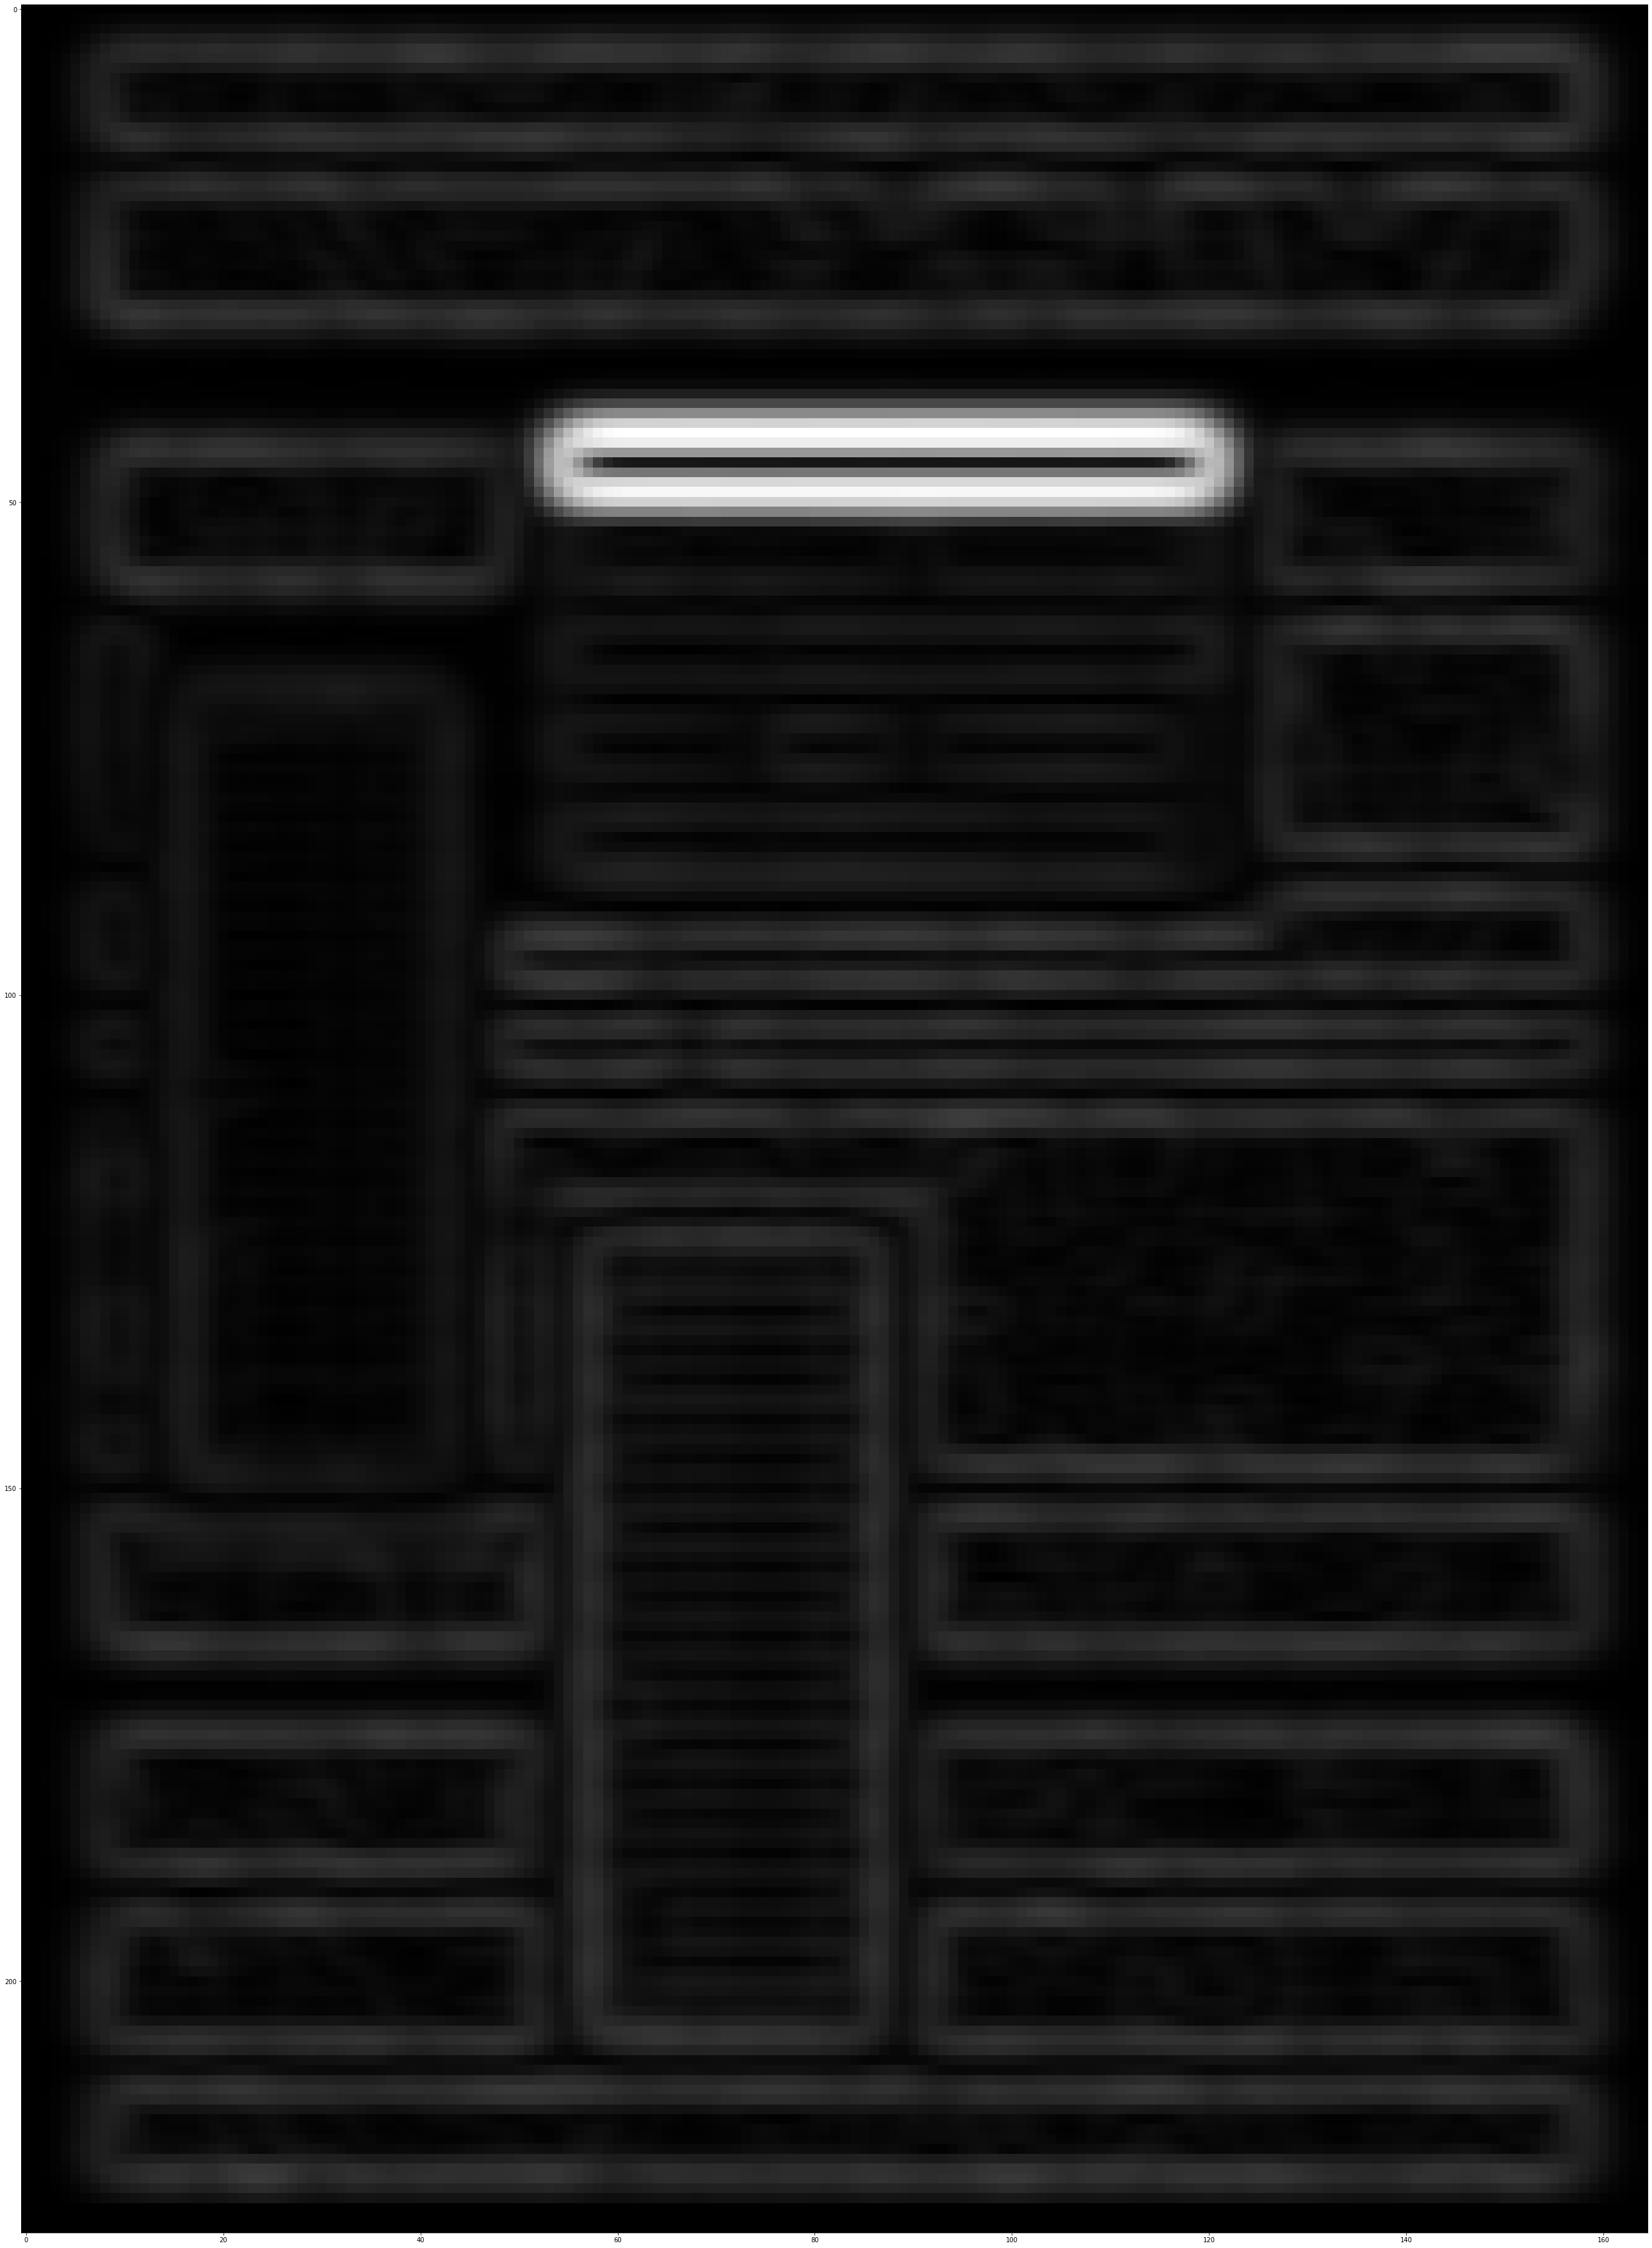

In [39]:
from skimage.restoration import denoise_bilateral, denoise_wavelet, estimate_sigma

sigma_est = estimate_sigma(diff_roberts_scharr, multichannel=False, average_sigmas=True)
#sigma_est

denoised = denoise_bilateral(edge_scharr, multichannel=False)

plt.figure(figsize=(64, 64))
plt.imshow(denoised, cmap='gray')

c:\users\paulp\appdata\local\programs\python\python37\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


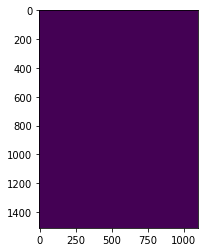

In [125]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import watershed, disk
from skimage.filters import rank

denoised = gauss_sobel
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

gradient = rank.gradient(denoised, disk(2))
labels = watershed(gradient, markers)

plt.imshow(labels)

Variance retained 82.7650476124505 %
Compression Ratio 0.45454545454545453 %
Variance retained 96.16768850722993 %
Compression Ratio 2.272727272727273 %
Variance retained 99.20744063779514 %
Compression Ratio 11.363636363636363 %


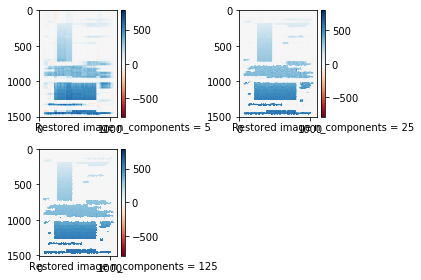

In [6]:
from sklearn.decomposition import PCA
from pylab import *
import skimage

for i in range(1, 4):
    n_comp = 5 ** i
    pca = PCA(n_components = n_comp)
    pca.fit(labels)
    coke_gray_pca = pca.fit_transform(labels)
    coke_gray_restored = pca.inverse_transform(coke_gray_pca)
    subplot(2, 2, i)
    skimage.io.imshow(coke_gray_restored)
    xlabel('Restored image n_components = %s' %n_comp)
    print('Variance retained %s %%' %((1 - sum(pca.explained_variance_ratio_) / size(pca.explained_variance_ratio_)) * 100))
    print('Compression Ratio %s %%' %(float(size(coke_gray_pca)) / size(labels) * 100))